# Dataset exploration

In [1]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

# Time
import time
import datetime

2024-04-27 17:26:29.098386: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 17:26:29.098507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 17:26:29.193604: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('../input/gtsrb-german-traffic-sign/','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [3]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# CNN model building

In [9]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding = "same", name='block1_conv1', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3,3), name='block1_conv2', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='block1_pool'))
model.add(Dropout(rate=0.25))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), strides = 1, padding = "same", activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), name='block2_conv1', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), name='block2_conv2', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='block2_pool'))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 907,339 (3.46 MB)

 Trainable params: 907,339 (3.46 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [10]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 70
#     x_train = tf.convert_to_tensor(X_train, dtype = tf.float32)
#     x_test = tf.convert_to_tensor(X_test, dtype = tf.float32)
    # history1 = model.fit(X_train, y_train, batch_size=25, epochs=epochs, validation_data=(X_test, y_test))
    history1 = model.fit(X_train, y_train, batch_size=50, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/70
 28/628 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0324 - loss: 13.3181      

W0000 00:00:1714239213.581787     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


628/628 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4204 - loss: 3.0568

W0000 00:00:1714239219.929859     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714239220.615398     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


628/628 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.4208 - loss: 3.0542 - val_accuracy: 0.9653 - val_loss: 0.1469
Epoch 2/70
628/628 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9106 - loss: 0.3207 - val_accuracy: 0.9834 - val_loss: 0.0773
Epoch 3/70
628/628 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9485 - loss: 0.1772 - val_accuracy: 0.9871 - val_loss: 0.0662
Epoch 4/70
628/628 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9635 - loss: 0.1241 - val_accuracy: 0.9801 - val_loss: 0.0685
Epoch 5/70
628/628 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9680 - loss: 0.1115 - val_accuracy: 0.9923 - val_loss: 0.0391
Epoch 6/70
628/628 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9732 - loss: 0.0925 - val_accuracy: 0.9913 - val_loss: 0.0378
Epoch 7/70
628/628 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9737 - loss: 0.0946 - val_accuracy: 0.9927 - val_loss: 0.0410
Epoch 8/70
628/628 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9800 - loss: 0.0804 - val_accuracy: 0.9934 - va

# Visualizing the performance of the Model during Training Phase

In [11]:
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [12]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

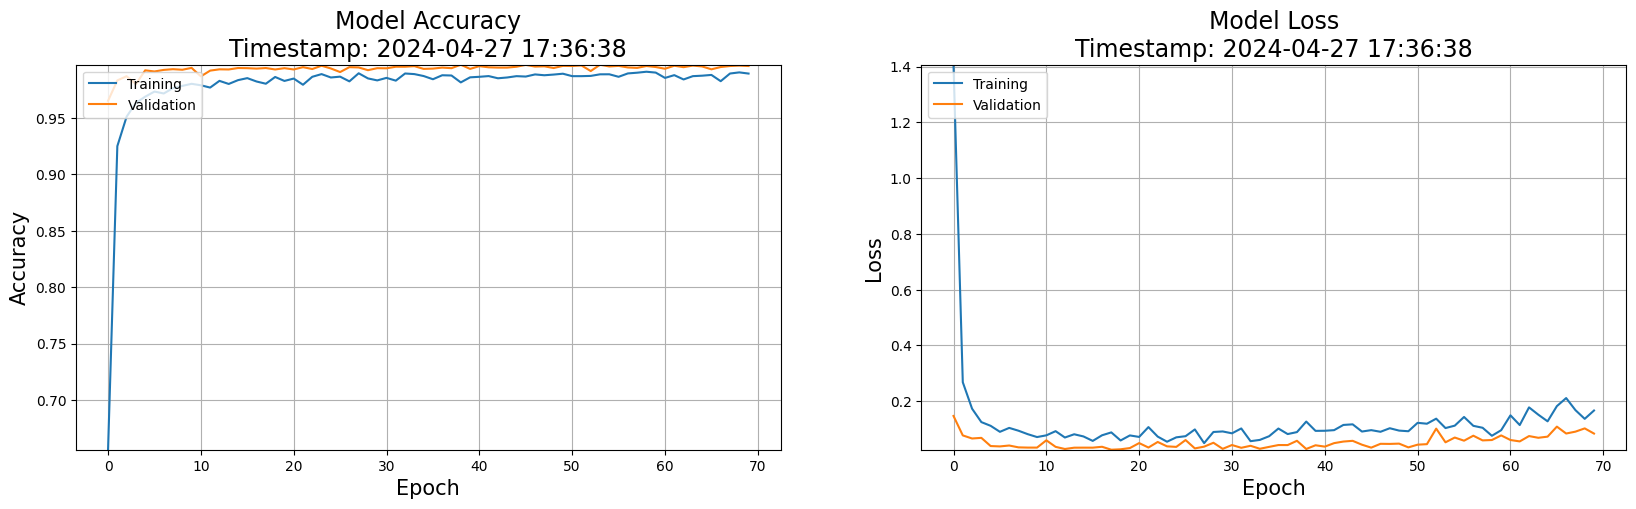

In [13]:
plot_performance(history=history1)

# Loading Test Dataset and Evaluating the Model

In [21]:
# testing accuracy on test dataset
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Importing the test dataset
y_test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('../input/gtsrb-german-traffic-sign/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

In [30]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print('accuracy:')
print(accuracy_score(labels, pred))
print('precision:')
print(precision_score(labels, pred, average='weighted'))
print('recall:')
print(recall_score(labels, pred, average='weighted'))
print('f1:')
print(f1_score(labels, pred, average='weighted'))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
accuracy:
0.9719714964370546
precision:
0.9729889807455658
recall:
0.9719714964370546
f1:
0.9718938827402985


# Saving the Model

In [31]:
# Saving the Model 
model.save('traffic_classifier.h5')